In [2]:
from zanj import ZANJ
from maze_dataset import MazeDataset, MazeDatasetConfig
from maze_dataset.generation import LatticeMazeGenerators, GENERATORS_MAP

GENERATORS: list[tuple[str, dict]] = [
    ("gen_dfs", dict()),
    ("gen_wilson", dict()),
    ("gen_dfs_percolation", dict(p=0.2)),
    ("gen_dfs_percolation", dict(p=0.4))
]

LOCAL_DATA_PATH: str = "data/"
DATASETS: dict[int, list[MazeDataset]] = dict()
zanj: ZANJ = ZANJ(external_list_threshold=256)
for grid_n in [32]:
	DATASETS[grid_n] = list()
	for gen_name, gen_kwargs in GENERATORS:
		# print(gen_name)
		print(f"Generating {gen_name} for grid_n={grid_n}")
		DATASETS[grid_n].append(MazeDataset.from_config(
			MazeDatasetConfig(
				name="demo",
				maze_ctor=GENERATORS_MAP[gen_name],
				grid_n=grid_n,
				n_mazes=8,
				maze_ctor_kwargs=gen_kwargs,
			),
			local_base_path=LOCAL_DATA_PATH + str(grid_n) + '/',
			load_local=False,
			verbose=False,
			zanj=zanj,
		))


Generating gen_dfs for grid_n=32
Generating gen_wilson for grid_n=32
Generating gen_dfs_percolation for grid_n=32
Generating gen_dfs_percolation for grid_n=32


In [5]:
for g, ds_list in DATASETS.items():
    for ds in ds_list:
        print(ds[1])
        print(ds[0].as_pixels(False, False).shape)

SolvedMaze(connection_list=array([[[False,  True,  True, ...,  True, False,  True],
        [ True, False,  True, ...,  True,  True,  True],
        [ True,  True, False, ..., False, False,  True],
        ...,
        [ True, False,  True, ...,  True,  True,  True],
        [ True,  True, False, ..., False, False,  True],
        [False, False, False, ..., False, False, False]],

       [[ True, False,  True, ..., False,  True, False],
        [ True, False, False, ..., False,  True, False],
        [False,  True, False, ...,  True, False, False],
        ...,
        [ True, False,  True, ..., False, False, False],
        [ True, False, False, ...,  True, False, False],
        [False,  True,  True, ...,  True,  True, False]]]), generation_meta={'func_name': 'gen_dfs', 'grid_shape': array([32, 32]), 'start_coord': array([ 4, 29]), 'n_accessible_cells': 1024, 'max_tree_depth': 2048, 'fully_connected': True, 'visited_cells': {(26, 21), (15, 21), (7, 17), (18, 17), (26, 30), (15, 30), 

AttributeError: 'MazeDataset' object has no attribute 'shape'

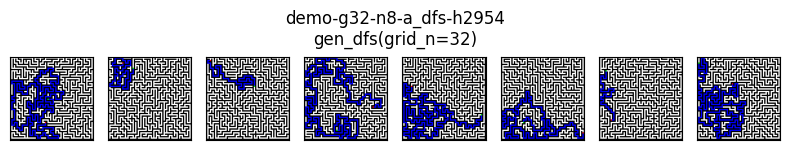

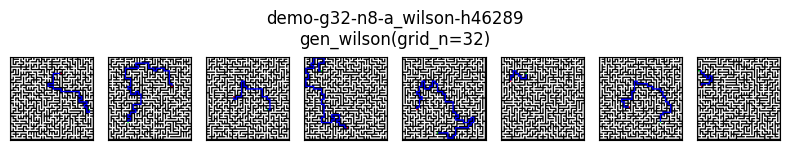

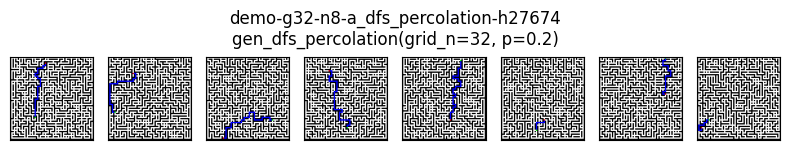

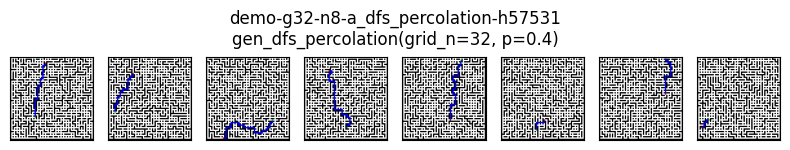

In [3]:
from maze_dataset.plotting import plot_dataset_mazes, print_dataset_mazes

for g, ds_list in DATASETS.items():
    for ds in ds_list:
        plot_dataset_mazes(ds)

In [18]:
import matplotlib.pyplot as plt
import numpy as np
a = None
i=0
output_shape = (64, 64)
num = 800
output = np.zeros((num, output_shape[0], output_shape[1]))
for g, ds_list in DATASETS.items():
    for ds in ds_list:
        print(len(ds))
        a = ds
        print(a)
        for idx in range(len(ds)):
            map = ds[idx].as_pixels(False, False)
            



8
8
8
8


In [10]:
import numpy as np

a = np.zeros((800, output_shape[0], output_shape[1]))

In [11]:
a.shape

(800, 64, 64)